In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [70]:
experiment = "01_Multiplication" # 506
# experiment = "02_Compare" # 507|508|509
experiment = "03_Share"
# experiment = "04_LogReg" # 526|527|528
# experiment = "05_Reveal" # 512
# experiment = "06_LeNet" # 529|530|531
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
# experiment = "11_Auction" # 521|522|523
# experiment = "12_VGG" # 532|533|534
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

data=[]
# framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]
framworks = ["MPyC", "HPMPC", "mp-slice", "MP-SPDZ"]

base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [71]:
import pandas as pd


In [72]:
# fl_paths[-1].split("/")[-2]

In [73]:
# runtime/3600

mean bandwidths(Mbs)
100      3.193000
1000     2.492000
10000    2.399000
25000    2.409667
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      0.077990
1000     0.016990
10000    0.010985
25000    0.012653
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      0.075986
1000     0.021994
10000    0.020993
25000    0.020993
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.461000
1000     0.285000
10000    0.255000
25000    0.271333
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      0.253000
1000     0.248000
10000    0.244000
25000    0.248333
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.462000
1000     0.288000
10000    0.222000
25000    0.215667
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.469
1000     0.291
10000    0.221
25000    0.218
Name: runtime_external(s), dtype: float64
['MPyC', 'HPMPC', 'MP-Slice', 'MP-S

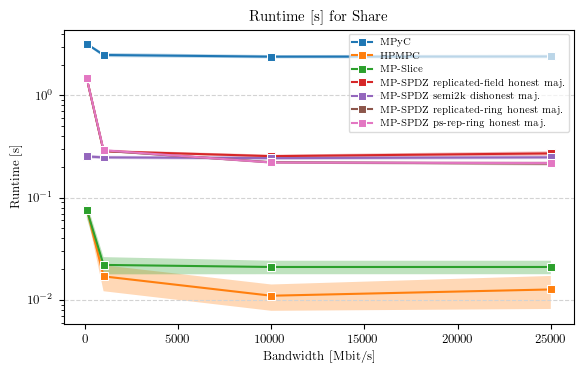

In [74]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[-2]
# del label[-2]
# label = ['HPMPC',
#          'mp-slice RCA',
#          'mp-slice PPA',
#          'mp-slice PPA4',
#          'MP-SPDZ replicated-ring honest maj.',
#          'MP-SPDZ semi2k dishonest maj.']

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

label = ['MPyC', 'HPMPC', 'MP-Slice', 'MP-SPDZ replicated-field honest maj.', 'MP-SPDZ semi2k dishonest maj.', 'MP-SPDZ replicated-ring honest maj.', 'MP-SPDZ ps-rep-ring honest maj.']

print(label)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

mean latencies(ms)
0     2.409667
25    2.954000
50    3.665000
75    4.200000
Name: runtime_external(s), dtype: float64
mean latencies(ms)
0     0.012653
25    0.286990
50    0.560993
75    0.834996
Name: runtime_external(s), dtype: float64
mean latencies(ms)
0    0.020993
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0     0.271333
25    2.666000
50    5.051000
75    7.336000
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0     0.248333
25    1.750000
50    3.249000
75    4.758000
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0     0.215667
25    2.669000
50    5.042000
75    7.477000
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0     0.218
25    2.783
50    5.304
75    7.844
Name: runtime_external(s), dtype: float64


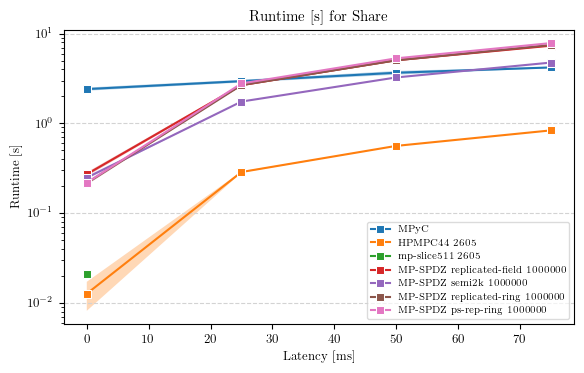

In [75]:
latency,label=rf.get_latency_deviation(data)
# del latency[0] # AUCTION
# del latency[1]
# del latency[2]
# del latency[-2]
# del latency[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del latency[-1]
# del label[-2]
# del latency[-2]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

# del latency[-7] # LogReg
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

mean packetdrops(%)
0    2.409667
1    2.547000
2    2.418000
5    3.059000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.012653
1    1.133990
2    2.135993
5    3.802994
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.020993
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.271333
1    0.610000
2    1.446000
5    3.865000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.248333
1    0.509000
2    1.144000
5    2.126000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.215667
1    0.544000
2    1.040000
5    3.898000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.218
Name: runtime_external(s), dtype: float64


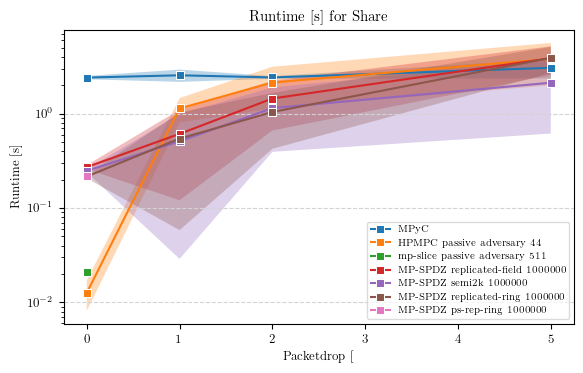

In [76]:
packetdrop,label=rf.get_packetdrop_deviation(data)
# del packetdrop[0] # AUCTION
# del packetdrop[1]
# del packetdrop[2]
# del packetdrop[-2]
# del packetdrop[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del packetdrop[-1]
# del label[-2]
# del packetdrop[-2]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]
# print(packetdrop)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [%]","Runtime [s]",True)

In [77]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[2]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # Division
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]
[df['mean'].iloc[0] for df in bandwidth]

mean bandwidths(Mbs)
100      3.193000
1000     2.492000
10000    2.399000
25000    2.409667
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      0.077990
1000     0.016990
10000    0.010985
25000    0.012653
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      0.075986
1000     0.021994
10000    0.020993
25000    0.020993
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.461000
1000     0.285000
10000    0.255000
25000    0.271333
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      0.253000
1000     0.248000
10000    0.244000
25000    0.248333
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.462000
1000     0.288000
10000    0.222000
25000    0.215667
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.469
1000     0.291
10000    0.221
25000    0.218
Name: runtime_external(s), dtype: float64


[3.193,
 0.0779904,
 0.07598640000000001,
 1.4609999999999999,
 0.253,
 1.462,
 1.4689999999999999]

In [78]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.07543208866258436,
 0.006329614964593026,
 0.01265206234572056,
 0.009944289260117584,
 0.01159501808728406,
 0.009189365834726805,
 0.007378647873726233]

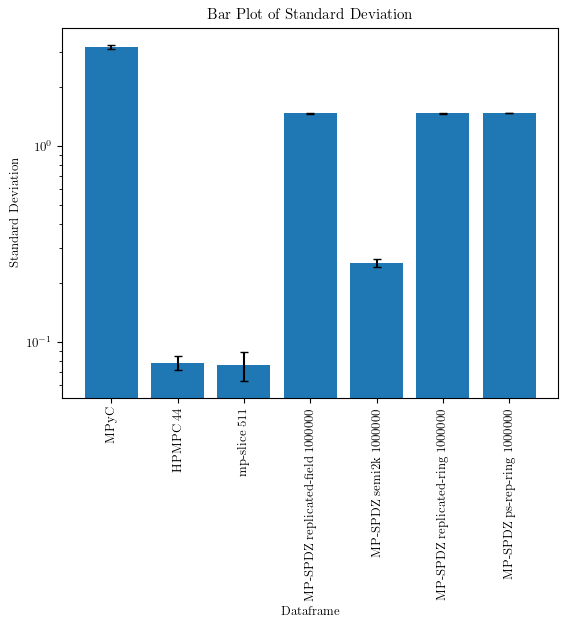

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


In [80]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Example data
# fig, ax = plt.subplots()
# deviation61 = data[0].loc[(data[0]['function'] == 507) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation62 = data[0].loc[(data[0]['function'] == 508)  & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation63 = data[0].loc[(data[0]['function'] == 509) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# 
# # Plot the first violin plot
# two_dimensional_list = [deviation61, deviation62, deviation63]
# ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# # Set the x-tick labels
# ax.set_xticks([1, 2, 3])
# ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])
# 
# 
# # Set plot title and labels
# plt.title("Devation of runtime for HP-MPC Logistic Regression")
# plt.xlabel("Comparison Type")
# plt.ylabel("Runtime [s]")
# ax.figure.set_size_inches(5.91, 2.8)
# fig.tight_layout()
# plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
# plt.show()